### Quick visualization of CLM, EvapTrans, and Pressure outputs  
In order to quickly do a visual check of PFCLM run variables, this notebook 
1. Reads in pfb output files
2. Plots single CLM variable for one timestep (you can change variable, but would have to load in new pfb to check other timsteps here)  
3. Creates a subplot of all CLM variables for one timestep, saves fig in this directory  
4. Plots EvapTrans top soil layer for one timestep (would have to load in new pfb to check other timsteps here)  
5. Plots top Pressure at one timestep

In [6]:
## load PFCLM output and make plots / do analysis

from parflow.tools.fs import get_absolute_path
import parflow as pf
from parflow import Run
from parflow.tools.io import read_pfb,write_pfb


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import glob
import xarray as xr
import time
import os

from osgeo import gdal

In [38]:
relative_path_to_runfolder = '/hydrodata/temp/CONUS2_transfers/CONUS2/spinup_WY2003/run_inputs'
run_name = 'spinup.wy2003'

#relative_path_to_runfolder = '/glade/scratch/tijerina/CONUS2/scaling_runs/spinup_scaling/outputs_r9_0-25_4'
#run_name = 'spinup.scaling.9.70_54'

run = Run.from_definition(f'{relative_path_to_runfolder}/{run_name}.pfidb')
data = run.data_accessor

# formatting the mask so that values outside the domain are NA and inside the domain are 1
# check with mask that has 0 and 1
mask = data.mask
active_mask=mask.copy()
active_mask[active_mask > 0] = 1
active_mask[active_mask == 0] = np.nan
mask2d = active_mask[0,...] #create single layer mask for 2D files

Solver: Field BinaryOutDir is not part of the expected schema <class 'parflow.tools.database.generated.Solver'>
Solver.OverlandKinematic: Field SeepageOne is not part of the expected schema <class 'parflow.tools.database.generated.OverlandKinematic'>
Solver.OverlandKinematic: Field SeepageTwo is not part of the expected schema <class 'parflow.tools.database.generated.OverlandKinematic'>
  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx


In [39]:
active_mask[9,2000:2005,2000:2005]

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [40]:
active_mask[9,0:5,0:5]

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

#### 1. Read in CLM, EvapTrans, and Pressure files (pfb)

In [4]:
# timestep of file you want to read
timestep = '00450' #hourly timestep, 5 digits

In [5]:
clm_file = pf.read_pfb(f'{relative_path_to_runfolder}/{run_name}.out.clm_output.{timestep}.C.pfb')
ET_file = pf.read_pfb(f'{relative_path_to_runfolder}/{run_name}.out.evaptrans.{timestep}.pfb') * active_mask
press_file = pf.read_pfb(f'{relative_path_to_runfolder}/{run_name}.out.press.{timestep}.pfb') * active_mask

#### 2. Plot single CLM variable for one timestep

Text(0.5, 1.0, 'CLM variable 0, timestep 00450')

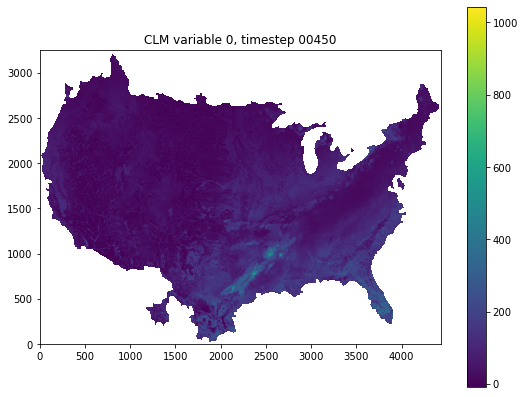

In [6]:
# the value in the first index determines the CLM variable to be plotted (e.g. [2, :, :] = Sensible Heat)
# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0  total latent heat flux (Wm-2) 1
# 1  total upward LW radiation (Wm-2)  1 nan
# 2  total sensible heat flux (Wm-2) 1 nan
# 3  ground heat flux (Wm-2) 1 nan
# 4  net veg. evaporation and transpiration and soil evaporation (mms-1) 1
# 5  ground evaporation (mms-1) 1
# 6  soil evaporation (mms-1) 1
# 7  vegetation evaporation (canopy) and transpiration (mms-1) 0
# 8  transpiration (mms-1) 0
# 9  infiltration flux (mms-1) 0?
# 10 SWE (mm) 0
# 11 ground temperature (K) 0 nan
# 12 irrigation flux
# 13 - 17 Soil temperature by layer (K) nan

# SET CLM VAR YOU WANT TO CHECK (from list above)
clm_var = 0

clm_file[clm_file < -9000] = 'Nan'
clm_var_timestep1 = clm_file[clm_var, :, :]

plt.figure(figsize = (9,7))
plt.imshow(clm_var_timestep1, origin="lower")
plt.colorbar()
plt.title(f'CLM variable {clm_var}, timestep {timestep}')

#### 3. Create a subplot of all CLM variables

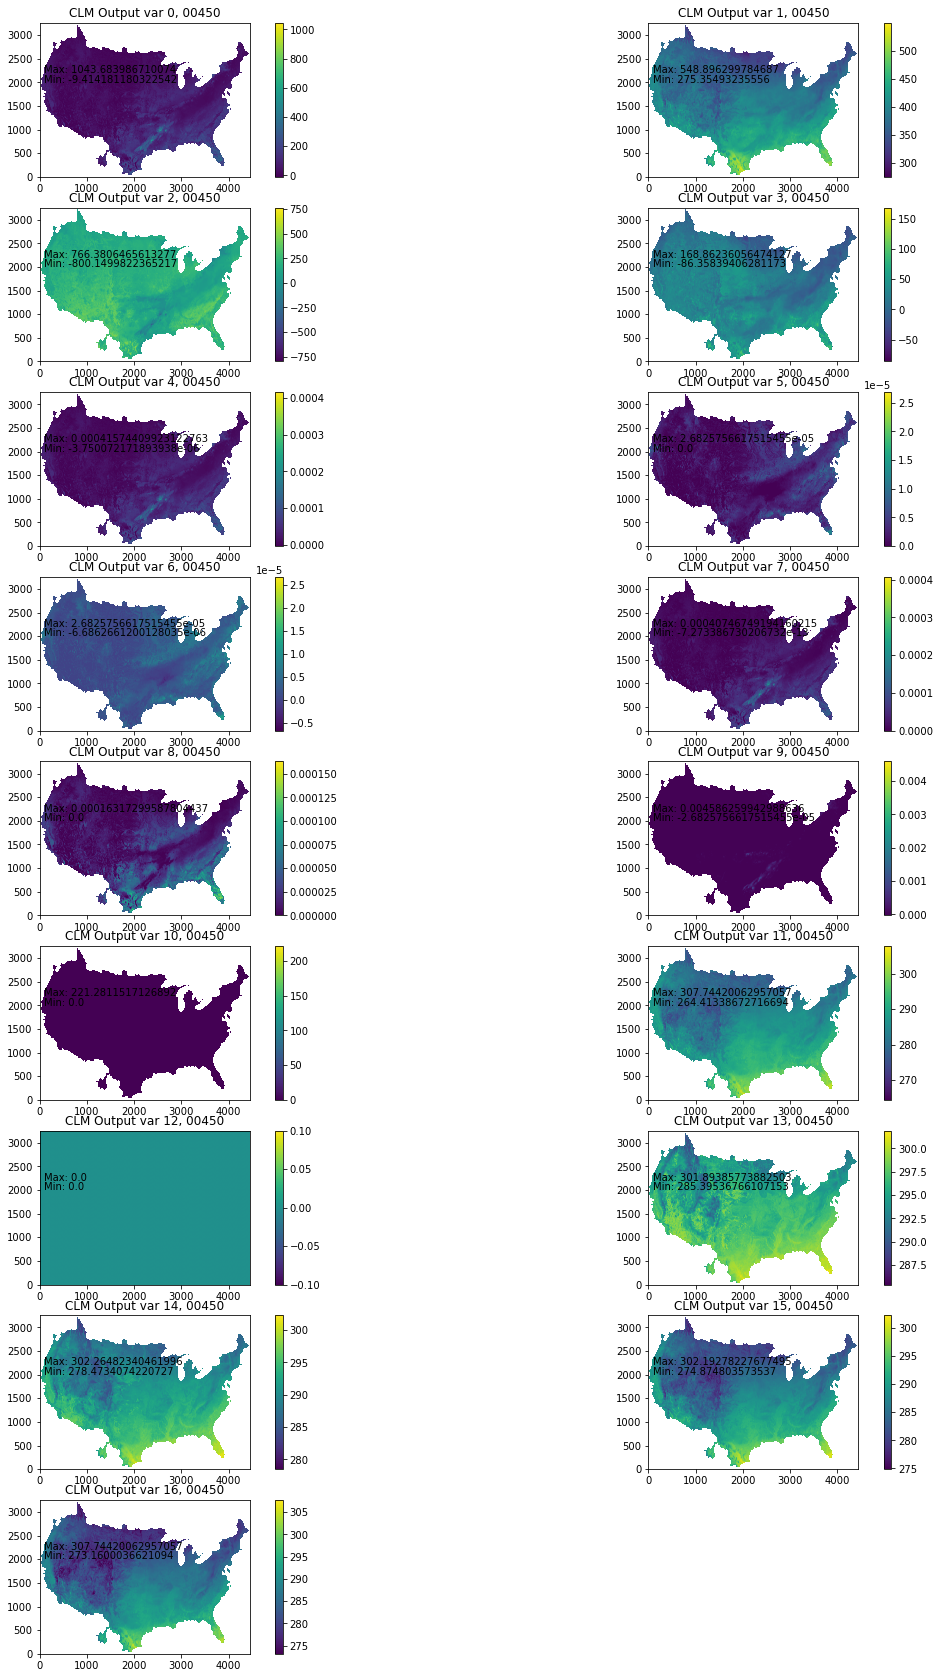

In [7]:
# Plot all CLM variables for the first hour
plt.subplots(5,2, figsize = (20,30))
for i in range (17):
    img_np = clm_file[i]
    plt.subplot(9,2,1+i)
    plt.imshow(img_np, origin="lower")
    plt.colorbar()
    plt.title(f'CLM Output var {i}, {timestep}')
    plt.annotate(f'Max: {np.nanmax(clm_file[i])}', xy = (100,2200))
    plt.annotate(f'Min: {np.nanmin(clm_file[i])}', xy = (100,2000))

#plt.savefig(f'CLM-update_CLM-variables_{timestep}.png',dpi=300)
plt.show()

# plt.subplots(9,2, figsize = (20,30))
# for i in range (17):
#     img_np = clm_00001[i]
#     plt.subplot(9,2,1+i)
#     plt.imshow(img_np, origin="lower")
#     plt.colorbar()
#     plt.title(f'clm_var_timestep1 {i}')
#     plt.annotate(f'Max: {clm_00001[i].max()}', xy = (100,2200))
#     plt.annotate(f'Min: {clm_00001[i].min()}', xy = (100,2000))
    
# plt.show()

#### 4. Plot EvapTrans

Max: 0.16510535794759088
Min: -0.0023257317172245273


Text(100, 2000, 'Min: -0.0023257317172245273')

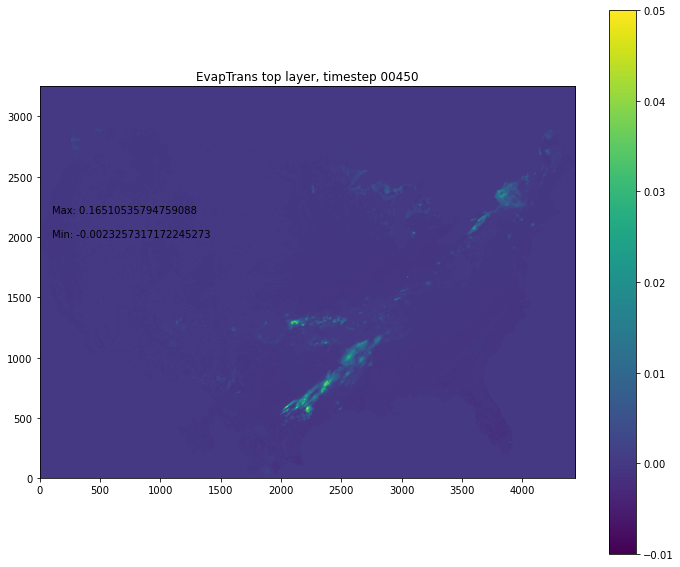

In [8]:
et_top = ET_file[9, :, :]
print(f'Max: {et_top.max()}')
print(f'Min: {et_top.min()}')

plt.figure(figsize = (12,10))
plt.imshow(et_top, origin="lower", vmin = -0.01, vmax = 0.05)
plt.colorbar()
plt.title(f'EvapTrans top layer, timestep {timestep}')
plt.annotate(f'Max: {np.nanmax(et_top)}', xy = (100,2200))
plt.annotate(f'Min: {np.nanmin(et_top)}', xy = (100,2000))

#### 5. Plot pressure

Max: 14.958702167579172
Min: -21.051749601610503


Text(0.5, 1.0, 'Pressure top layer, timestep 00450')

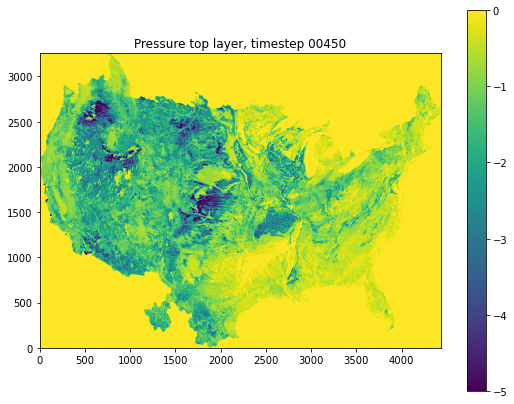

In [9]:
#press_file[press_file < -90000000000000] = 'Nan'
press_top = press_file[9, :, :]
print(f'Max: {np.nanmax(press_top)}')
print(f'Min: {np.nanmin(press_top)}')

plt.figure(figsize = (9,7))
plt.imshow(press_top, origin="lower", vmin = -5, vmax = 0)
plt.colorbar()
plt.title(f'Pressure top layer, timestep {timestep}')
#plt.annotate(f'Max: {np.nanmax(press_top)}', xy = (100,2200))
#plt.annotate(f'Min: {np.nanmin(press_top)}', xy = (100,2000))

#### A. Hoang Initial Spinup Pressure

In [31]:
hoang_init_press = pf.read_pfb('/glade/scratch/tijerina/from_hoang/CONUS2_spinup_all_seepage.out.press.08754.pfb')

Max: 72.02130637945105
Min: -21.05173434300854


Text(0.5, 1.0, 'Hoang Initial Pressure, top layer')

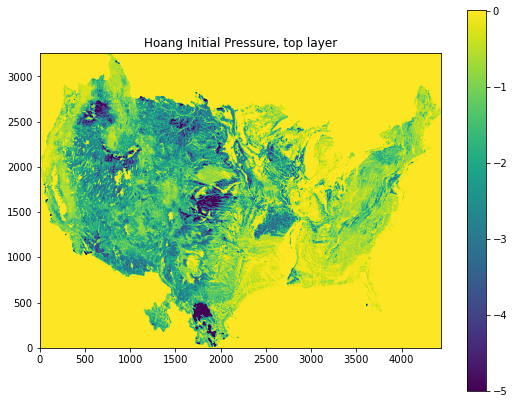

In [41]:
hoang_init_press[hoang_init_press < -90000000000000] = 'Nan'
hoang_press_top = hoang_init_press[9, :, :]
print(f'Max: {np.nanmax(hoang_press_top)}')
print(f'Min: {np.nanmin(hoang_press_top)}')

plt.figure(figsize = (9,7))
plt.imshow(press_top, origin="lower", vmin = -5, vmax = 0.01)
plt.colorbar()
plt.title(f'Hoang Initial Pressure, top layer')
#plt.annotate(f'Max: {np.nanmax(hoang_press_top)}', xy = (100,2200))
#plt.annotate(f'Min: {np.nanmin(hoang_press_top)}', xy = (100,2000))

## Check input files  
Slope

In [3]:
inputs_path = '/hydrodata/temp/CONUS2_transfers/CONUS2/spinup_WY2003/model_inputs'

In [43]:
slopex = np.squeeze(read_pfb(f'{inputs_path}/CONUS2.0.Final1km.slopex.pfb'))*mask2d
slopey = np.squeeze(read_pfb(f'{inputs_path}/CONUS2.0.Final1km.slopey.pfb'))*mask2d

In [44]:
print(f'Slope_x maximum: {np.nanmax(slopex)}')
print(f'Slope_x minimum: {np.nanmin(slopex)}')
print('')
print(f'Slope_y maximum: {np.nanmax(slopey)}')
print(f'Slope_y minimum: {np.nanmin(slopey)}')

Slope_x maximum: 0.934
Slope_x minimum: -0.9711699829101562

Slope_y maximum: 1.0260699462890626
Slope_y minimum: -1.014


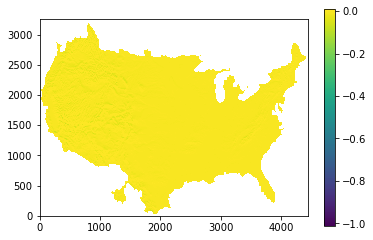

In [51]:
plt.imshow(slopey, origin='lower', vmax=0.01)
plt.colorbar()

In [76]:
total_cells = np.count_nonzero(~np.isnan(slopex))
# find count of slopes that are > 0.5
large_slopex = np.copy(slopex)
large_slopex[large_slopex<0.5] = np.nan 
print(f'Number of slope_x cells >0.5: {np.count_nonzero(~np.isnan(large_slopex))}')
print(f'{np.round((np.count_nonzero(~np.isnan(large_slopex))/total_cells)*100, decimals=2)}% of total domain')


Number of slope_x cells >0.5: 2032
0.03% of total domain


In [77]:
# find count of slopes that are > 0.1
med_slopex = np.copy(slopex)
med_slopex[med_slopex<0.1] = np.nan 
print(f'Number of slope_x cells >0.1: {np.count_nonzero(~np.isnan(med_slopex))}')
print(f'{np.round((np.count_nonzero(~np.isnan(med_slopex))/total_cells)*100, decimals=2)}% of total domain')

Number of slope_x cells >0.1: 223991
2.85% of total domain


In [78]:
# find count of slopes that are > 0.5
large_slopey = np.copy(slopey)
large_slopey[large_slopey<0.5] = np.nan 
print(f'Number of slope_y cells >0.5: {np.count_nonzero(~np.isnan(large_slopey))}')
print(f'{np.round((np.count_nonzero(~np.isnan(large_slopey))/total_cells)*100, decimals=2)}% of total domain')

Number of slope_y cells >0.5: 2009
0.03% of total domain


In [79]:
# find count of slopes that are > 0.1
med_slopey = np.copy(slopey)
med_slopey[med_slopey<0.1] = np.nan 
print(f'Number of slope_y cells >0.1: {np.count_nonzero(~np.isnan(med_slopey))}')
print(f'{np.round((np.count_nonzero(~np.isnan(med_slopey))/total_cells)*100, decimals=2)}% of total domain')

Number of slope_y cells >0.1: 189365
2.41% of total domain
